<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 6**

In the CART (Classification and Regression Trees) method applied to regression problems, the tree is built by recursively partitioning the data based on feature thresholds that aim to improve prediction accuracy. However, CART usses different formulations of the splitting criterion.

In this homework, I will explore and compare three approaches to split selection:

1. **Local RSS Minimization**:
Select the split that directly minimizes the sum of squared residuals in the resulting two child nodes.

2. **RSS Gain Maximization**:
Choose the split that maximizes the reduction in RSS, i.e., the difference between the parent node's RSS and the combined RSS of the children.

3. **Total RSS Minimization**:
Choose the split that minimizes the total RSS across all leaves of the updated tree (not just the node being split), thus optimizing the global tree structure at each step.

Let's give a more detailed explanation of these three criteria. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature  $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j,t)$  and  $R_2(X_j,t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

**1. Local RRS Minimization**

Choose the feature $X_j$ and threshold $t$ that minimize the sum of squared residuals (errors) in the two child regions only.

**Mathematically,** $$ (X_j^*, t^*) = \arg\min_{X_j, t} \left\{ \sum_{m=1}^{2} \sum_{i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2 \right\}. $$

**2. RSS Gain Maximization**

It is also a local method, looking only at a parent and two child nodes.

We select the feature and threshold that maximize the reduction in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node.

**Mathematically,** $$(X_j^*, t^*) = \arg\max_{X_j, t} \left\{ \sum_{i \in \text{Parent}} (y_i - \bar{y}_{\text{Parent}})^2 - \sum_{m=1}^{2} \sum_{i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2 \right\}.$$

**3. Total RSS Minimization**

Suppose you are growing a regression tree and considering a possible split $(X_j,t)$ that modifies the tree structure into $T(X_j,t)$. The Total RSS Minimization criterion selects the split that minimizes the sum of RSS in all leaves of the tree.

**Mathematically,** $$(X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \text{Leaves}(T(X_j, t))} \sum_{i \in R_m} (y_i - \bar{y}_{R_m})^2$$ where:
- $T(X_j,t)$: the tree obtained after applying the candidate split
- $R_m$: the region (leaf) $m$ of the new tree
- $\bar{y}_{R_m}$: the mean of the response values in region $R_m$






## **Equivalence  Analysis**

###**1. Local RSS Minimization vs RSS Gain Maximization**

Let's rewrite the RSS Gain Maximization formula like this:
- $\text{RSS}_{\text{parent}} = \sum_{i \in \text{Parent}} (y_i - \bar{y}_{\text{Parent}})^2$
- $\text{RSS}_{\text{children}} = \sum_{m=1}^{2} \sum_{i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2$

Then, the gain is $$\text{Gain}(X_j, t) = \text{RSS}_{\text{parent}} - \text{RSS}_{\text{children}}.$$

So, with the RSS Gain Method you are trying to find $$\arg\max_{X_j, t} \left\{ \text{RSS}_{\text{parent}} - \text{RSS}_{\text{children}} \right\}.$$

But now we notice that for any fixed parent node, RSS parent is constant — it does not depend on the split.

Therefore: $$\arg\max_{X_j, t} \left\{ \text{RSS}_{\text{parent}} - \text{RSS}_{\text{children}} \right\} \equiv \arg\min_{X_j, t} \left\{ \text{RSS}_{\text{children}} \right\}.$$

In words: Maximizing the gain is the same as minimizing the child RSS, since the parent RSS is fixed and doesn't change across the splits. So, these two methods are mathematically equivalent when you are evaluating splits at one node at a time, because the parent's RSS is a constant and doesn't affect which split is chosen.

This equivalence holds only if you split one node at a time.

### **2. Local RSS Minimization and RSS Gain Maximization vs Total RSS Minimization**

We can prove Local RSS Minimization and RSS Gain Maximization (which we have already seen that are equivalent) differ from Total RSS Minimization by finding one counterexample. It is enough to show that Local RSS Minimization differs from Total RSS Minimization.

We will consider a regression tree with two leaves: Leaf A and Leaf B.

- Leaf A: $y = [1,2,3]$
- Leaf B: $y = [100,105,110]$

We are considering two possible splits: Splitting Leaf A into two subregions or
splitting Leaf B into two subregions.

**Split 1: Split Leaf A**

We split Leaf A into:

- Left: $y=[1,2] \rightarrow \bar{y}_L = \frac{1 + 2}{2} = 1.5 \rightarrow RSS = (1 - 1.5)^2 + (2 - 1.5)^2 = 0.25 + 0.25 = 0.5$

- Right: $y=[3] \rightarrow \bar{y}_R = 3 \rightarrow RSS = 0$

<u>Local RSS after Split 1:</u> ${RSS}_{Split 1}=0.5+0=0.5$

Now, let's compute the total RSS. Leaf B remains the same: $y=[100,105,110].$


Mean of Leaf B: $\bar{y}_B = \frac{100+105+110}{3}=105 \rightarrow {RSS}_B=(100-105)^2+(105-105)^2+(110-105)^2=25+0+25=50$

<u>Total RSS after Split 1:</u> ${RSS}_{Split 1}=0.5+50=50.5$

**Split 2: Split Leaf B**

We split Leaf B into:

- Left: $y=[100,105] \rightarrow \bar{y}_L = \frac{100 + 105}{2} = 102.5 \rightarrow RSS = (100 - 102.5)^2 + (105-102.5)^2 = 6.25 + 6.25 = 12.5$

- Right: $y=[110] \rightarrow \bar{y}_R = 110 \rightarrow RSS = 0$

<u>Local RSS after Split 2:</u> ${RSS}_{Split 2}= 12.5 + 0 = 12.5$

Now, let's compute the total RSS. Leaf A remains the same: $y=[1,2,3].$


Mean of Leaf A: $\bar{y}_A = \frac{1+2+3}{3}=2 \rightarrow {RSS}_A=(1-2)^2+(2-2)^2+(3-2)^2=1+0+1=2$

<u>Total RSS after Split 2:</u> ${RSS}_{Split 2}=2+12.5=14.5$

**Summary:**
\begin{array}{|c|c|c|}
\hline
\text{Split} & \text{Local RSS} & \text{Total RSS} \\
\hline
\text{Split 1 (Leaf A)} & \mathbf{0.5} & 50.5 \\
\text{Split 2 (Leaf B)} & 12.5 & \mathbf{14.5} \\
\hline
\end{array}

This example shows that Split 1 has a better local RSS, so it would be chosen by Local RSS Minimization, but Split 2 leads to a much better total RSS, so it would be chosen by Total RSS Minimization.

Therefore, ${Local  RSS  Minimization} \not\equiv {Total  RSS  Minimization}.$

## **Empirical Verification**

First, let's construct the small dataset used before.

$X = [1, 2, 3, 10, 11, 12]$

$Y = [1 ,2, 3, 100, 105, 110]$

Now we are going to split it with sk-learn and see that this library uses Local RSS Minimization (and RSS Gain Maximization) in the first split.

   threshold  local_RSS  RSS_gain  matches model
0        1.5    12658.0    3307.5          False
1        2.5     7853.5    8112.0          False
2        6.5       52.0   15913.5           True
3       10.5     7217.5    8748.0          False
4       11.5    12134.8    3830.7          False


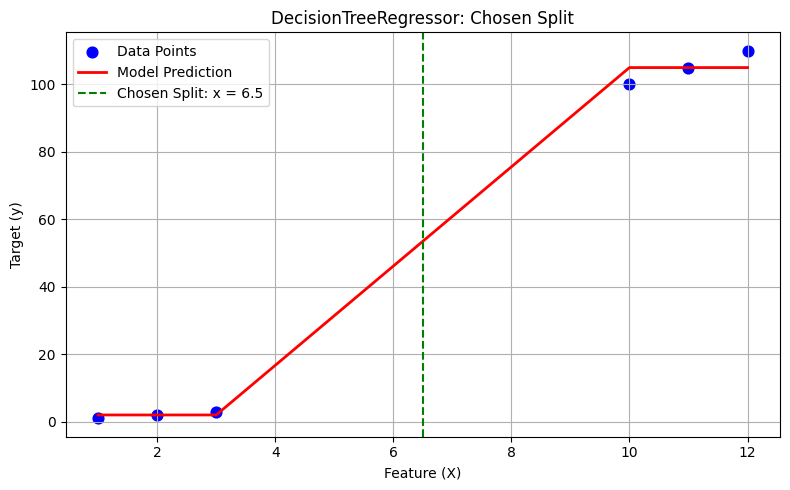

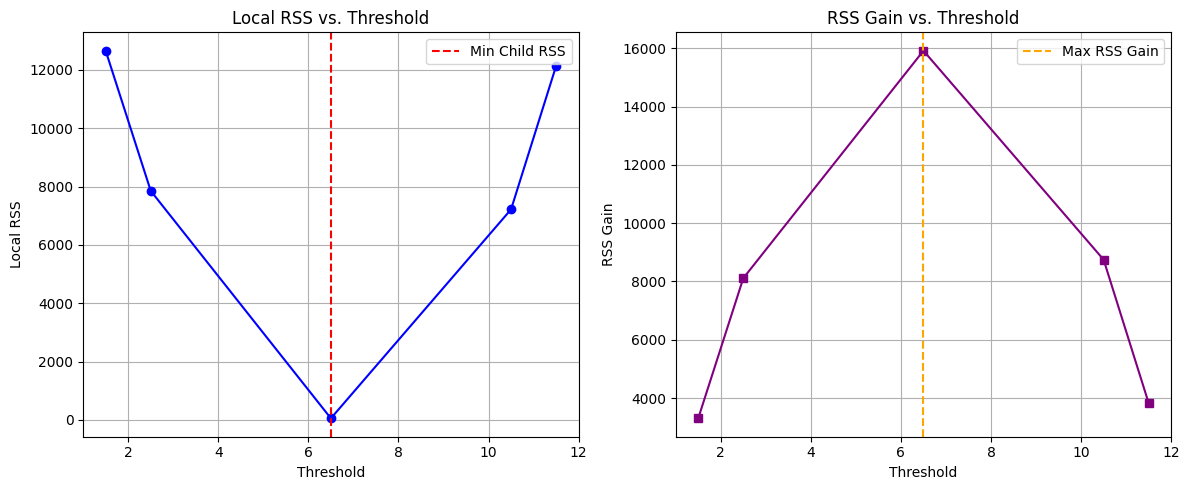

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Step 1: Create a small artificial dataset
X = np.array([[1], [2], [3], [10], [11], [12]])  # 1D feature
y = np.array([1, 2, 3, 100, 105, 110])  # target values

# Step 2: Manually compute split metrics
def compute_rss(y_subset):
    mean = np.mean(y_subset)
    return np.sum((y_subset - mean) ** 2)

splits = []
for i in range(1, len(X)):
    threshold = (X[i - 1, 0] + X[i, 0]) / 2
    left_mask = X[:, 0] < threshold
    right_mask = ~left_mask

    y_left = y[left_mask]
    y_right = y[right_mask]

    rss_left = compute_rss(y_left)
    rss_right = compute_rss(y_right)
    child_rss = rss_left + rss_right

    parent_rss = compute_rss(y)
    gain = parent_rss - child_rss

    splits.append({
        "threshold": threshold,
        "local_RSS": child_rss,
        "RSS_gain": gain
    })

# Step 3: Train a DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=1, criterion="squared_error", random_state=42)
reg.fit(X, y)
model_threshold = reg.tree_.threshold[0]

import pandas as pd
df = pd.DataFrame(splits)
df["matches model"] = np.isclose(df["threshold"], model_threshold)

print(df)

# Visualize the dataset and the split chosen by the model
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points', s=60)
plt.plot(X, reg.predict(X), color='red', linewidth=2, label='Model Prediction')
plt.axvline(x=model_threshold, color='green', linestyle='--', label=f"Chosen Split: x = {model_threshold:.1f}")
plt.title("DecisionTreeRegressor: Chosen Split")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot local RSS and RSS gain
plt.figure(figsize=(12, 5))

# Plot Child RSS
plt.subplot(1, 2, 1)
plt.plot(df["threshold"], df["local_RSS"], marker='o', color='blue')
plt.axvline(df.loc[df["local_RSS"].idxmin(), "threshold"], color='red', linestyle='--', label="Min Child RSS")
plt.title("Local RSS vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Local RSS")
plt.legend()
plt.grid(True)

# Plot RSS Gain
plt.subplot(1, 2, 2)
plt.plot(df["threshold"], df["RSS_gain"], marker='s', color='purple')
plt.axvline(df.loc[df["RSS_gain"].idxmax(), "threshold"], color='orange', linestyle='--', label="Max RSS Gain")
plt.title("RSS Gain vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("RSS Gain")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The table shows all possible thresholds, their corresponding Local RSS and the RSS gain. The row marked True in the matches model column indicates which threshold was chosen by DecisionTreeRegressor.

Since the chosen threshold corresponds to the split with the lowest child RSS and highest gain, this confirms that scikit-learn uses Local RSS Minimization / RSS Gain Maximization.

Now let's see it doesn't use Total RSS Minimization. In order to do this, we will do a second split as in the example shown before.

   threshold  local_RSS  total_RSS  matches model Region
0        1.5        0.5       50.5           True   LEFT
1        2.5        0.5       50.5          False   LEFT
2       10.5       12.5       14.5          False  RIGHT
3       11.5       12.5       14.5          False  RIGHT


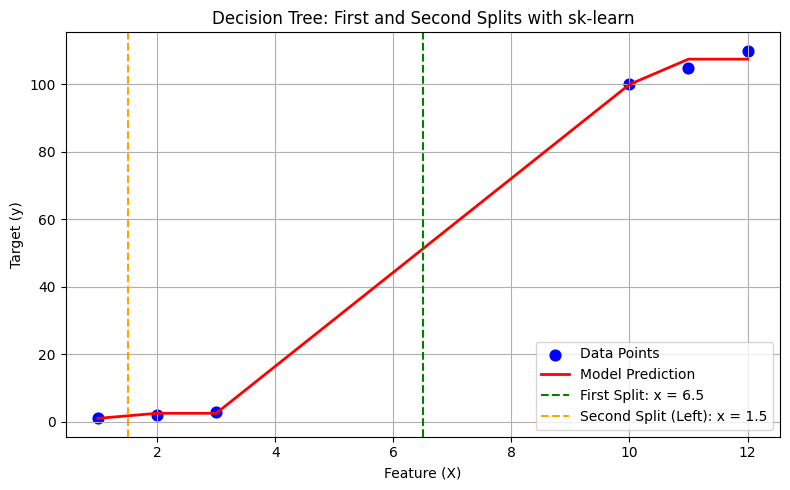

In [36]:

# Fit full tree with max_depth=2 to allow for a second split
reg = DecisionTreeRegressor(max_depth=2, criterion="squared_error", random_state=42)
reg.fit(X, y)

# Extract thresholds from the tree
tree = reg.tree_
first_thresh = tree.threshold[0]

# Identify which samples fall left or right of the first split
left_mask = X[:, 0] < first_thresh
right_mask = ~left_mask

X_left, y_left = X[left_mask], y[left_mask]
X_right, y_right = X[right_mask], y[right_mask]


# Helper: compute all splits in a subset
def evaluate_splits(X_subset, y_subset, rss_other_leaf):
    results = []
    for i in range(1, len(X_subset)):
        threshold = (X_subset[i - 1, 0] + X_subset[i, 0]) / 2
        left = y_subset[X_subset[:, 0] < threshold]
        right = y_subset[X_subset[:, 0] >= threshold]

        rss_left = compute_rss(left)
        rss_right = compute_rss(right)
        local_rss = rss_left + rss_right
        total_rss = local_rss + rss_other_leaf  # simulate other side fixed

        results.append({
            "threshold": threshold,
            "local_RSS": local_rss,
            "total_RSS": total_rss
        })

    return pd.DataFrame(results)

# Compute RSS for fixed other leaf (simulate total RSS)
rss_fixed_left = compute_rss(y_left)
rss_fixed_right = compute_rss(y_right)

df_right = evaluate_splits(X_right, y_right, rss_fixed_left)
df_right["matches model"] = np.isclose(df_right["threshold"], tree.threshold[2])  # sklearn second split is node 2 (right of root)

df_left = evaluate_splits(X_left, y_left, rss_fixed_right)
df_left["matches model"] = np.isclose(df_left["threshold"], tree.threshold[1])  # sklearn second split is node 1 (left of root)

# Return both tables for inspection
df_right["Region"] = "RIGHT"
df_left["Region"] = "LEFT"
df_all = pd.concat([df_left, df_right], ignore_index=True)
print(df_all)

# Extract final decision threshold for second split (from sklearn tree)
second_thresh = tree.threshold[1] if tree.children_left[0] != -1 else tree.threshold[2]

# Plot the dataset, the first split, and the second split lines
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points', s=60)
plt.plot(X, reg.predict(X), color='red', linewidth=2, label='Model Prediction')

# First split (root)
plt.axvline(x=first_thresh, color='green', linestyle='--', label=f"First Split: x = {first_thresh:.1f}")

# Second split
plt.axvline(x=second_thresh, color='orange', linestyle='--', label=f"Second Split (Left): x = {second_thresh_left:.1f}")

plt.title("Decision Tree: First and Second Splits with sk-learn")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The table shows that sk-learn chooses the split with the lowest Local RSS, not Total RSS.